Solve RFF with LM

In [27]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from pyselect.datasets import make_gregorova_se1, make_gregorova_se2, make_jordan_se1
from pyselect.model import RFFNet, RFFLayer

In [28]:
import numpy as np

In [29]:
rng = np.random.RandomState(0)
seed = 0

In [67]:
n_features = 10
n_random_features = 100

In [68]:
omega = rng.normal(size=(n_features, n_random_features))

In [69]:
unif = rng.uniform(0, 2*np.pi, size=n_random_features)

In [70]:
n_samples = 800
train_size = 500
n_features = 10

In [71]:
X, y = make_jordan_se1(n_samples=n_samples, random_state=seed)

In [72]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_size,
                                                    random_state=seed)

In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [110]:
def rff(param, X, y):
    alpha = param[:n_random_features].reshape(-1, 1)
    precisions = param[n_random_features:]
    z = np.sqrt(2/n_random_features) * np.cos((X * precisions) @ omega + unif) 
    err = y - z @ alpha
    return np.mean(err**2)

In [111]:
param = np.ones(n_features + n_random_features)

In [112]:
rff(param, X_train, y_train)

2.5765326030426166

In [113]:
from scipy.optimize import least_squares

In [117]:
a = least_squares(rff, x0=np.ones(n_features+n_random_features), ftol=1e-4, args=(X_train, y_train))

In [128]:
a.fun

array([0.78095559])

In [118]:
a.optimality

0.006418992442992732

In [119]:
a.success

True

<StemContainer object of 3 artists>

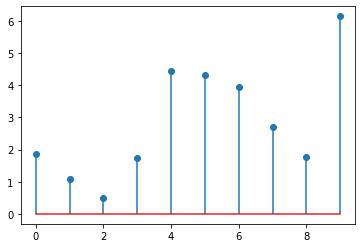

In [127]:
plt.stem(np.abs(a.x[n_random_features:]))